In [4]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from gradient_loader import load_stacked_gradients, load_gradients_by_batch

# Configuration
GRADIENTS_DIR = "results/gradients"
EPOCH_TO_LOAD = 0

print(f"Loading gradients from: {GRADIENTS_DIR}")
print(f"Epoch: {EPOCH_TO_LOAD}")

torch.set_grad_enabled(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading gradients from: results/gradients
Epoch: 0


In [5]:
stacked_gradients = load_stacked_gradients(GRADIENTS_DIR, EPOCH_TO_LOAD)
print(f"\n✅ Successfully loaded gradients for {len(stacked_gradients)} parameters")

# Show what we loaded
for param_name, gradients in stacked_gradients.items():
    print(f"  {param_name}: {gradients.shape}")

Loaded metadata: {'epoch': 0, 'batch_idx': 937, 'total_samples': 32, 'parameter_names': ['network.0.weight', 'network.0.bias', 'network.3.weight', 'network.3.bias']}
Found 3752 gradient files
Concatenating gradients from all batches...
Successfully loaded 4 parameters
  network.0.weight: torch.Size([60000, 32, 784]) (5742.19 MB)
  network.0.bias: torch.Size([60000, 32]) (7.32 MB)
  network.3.weight: torch.Size([60000, 10, 32]) (73.24 MB)
  network.3.bias: torch.Size([60000, 10]) (2.29 MB)
Total memory: 5825.04 MB

✅ Successfully loaded gradients for 4 parameters
  network.0.weight: torch.Size([60000, 32, 784])
  network.0.bias: torch.Size([60000, 32])
  network.3.weight: torch.Size([60000, 10, 32])
  network.3.bias: torch.Size([60000, 10])


🔍 GPU-Accelerated K-means Clustering Analysis
Analyzing parameter: network.3.weight
Gradient tensor shape: torch.Size([60000, 10, 32])
No digit filtering - using default n_clusters = 10

2. Performing GPU-accelerated k-means clustering with 10 clusters...
Performing GPU-accelerated k-means clustering on gradients tensor of shape torch.Size([60000, 10, 32])
Number of clusters: 10
Initialization method: random
Device: cuda:0
Using batches from 20.0% to 100.0% for clustering
Minimum gradient norm percentile: 0.5%
Clustering on 48000 batches (indices 12000 to 59999) out of 60000 total batches
Gradient norm percentile threshold: 0.0067
Filtered to 47760 gradients (out of 48000) with norm >= 0.0067
Final clustering shape: torch.Size([47760, 320])
Memory usage: 58.30 MB
Running k-means with 1 different initializations...


K-means initializations:   0%|          | 0/1 [00:00<?, ?it/s]

K-means initializations: 100%|██████████| 1/1 [00:00<00:00, 23.05it/s]

Clustering completed in 0.05 seconds
Assigning all original batches to clusters...

Clustering Results Summary:
  Inertia: 2227925.00
  Cluster sizes: {0: 1235, 1: 1591, 2: 1766, 3: 499, 4: 49659, 5: 1646, 6: 326, 7: 943, 8: 1110, 9: 1225}
  Clustering performed on 47760/48000 batches in subset (99.5%)
  Subset: 48000/60000 total batches (80.0%)



3. Plotting clustering results...


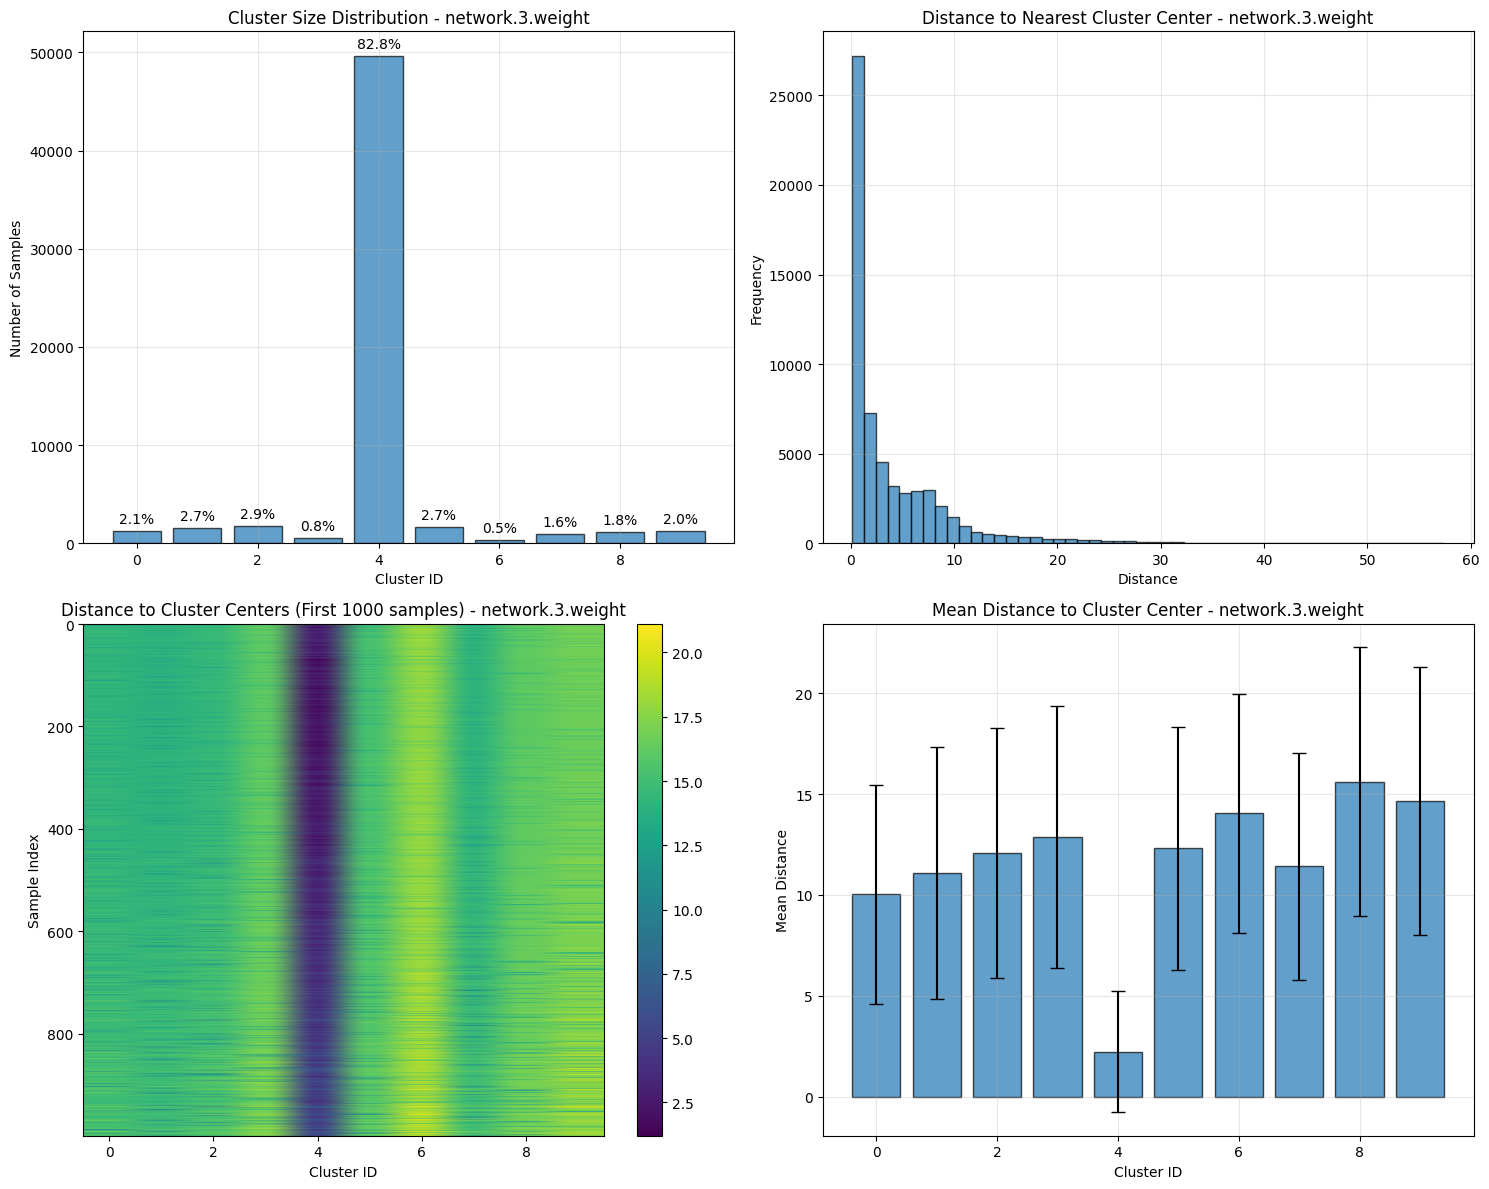

In [10]:
# Import the k-means clustering utilities and config
from k_means import kmeans_gradients, plot_clustering_results, analyze_cluster_characteristics, find_optimal_clusters
from config import Config

# Check if we have loaded gradients
if 'stacked_gradients' in locals() and stacked_gradients:
    print("🔍 GPU-Accelerated K-means Clustering Analysis")
    print("=" * 50)
    
    # Load config to check for digit filtering
    config = Config()
    
    # Pick a parameter to analyze (you can change this)
    param_name = list(stacked_gradients.keys())[2]
    gradients_tensor = stacked_gradients[param_name]

    print(f"Analyzing parameter: {param_name}")
    print(f"Gradient tensor shape: {gradients_tensor.shape}")
    
    # Automatically determine number of clusters based on filtering
    n_clusters = 10  # Default for all digits
    print("No digit filtering - using default n_clusters = 10")
    
    # Perform k-means clustering (with progress bar)
    print(f"\n2. Performing GPU-accelerated k-means clustering with {n_clusters} clusters...")
    clustering_results = kmeans_gradients(
        gradients_tensor.cuda(), 
        n_clusters=n_clusters,
        use_gpu=True,
        max_iter=1000,
        n_init=1,
        init_method="random",
        start_fraction=0.2,
        end_fraction=1,
        min_grad_percentile=0.5
        )
    
    # Plot comprehensive results
    print(f"\n3. Plotting clustering results...")
    plot_clustering_results(clustering_results, param_name)

param_name network.0.weight


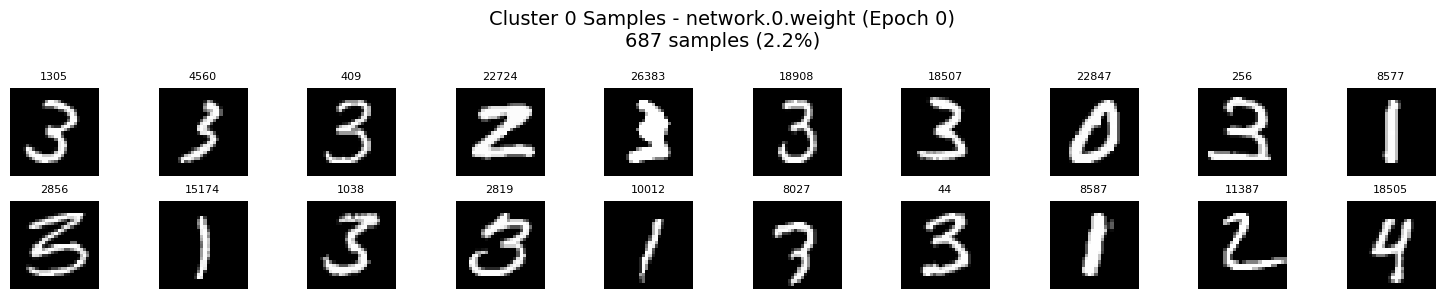


Cluster 0 Statistics for network.0.weight (Epoch 0):
  Size: 687 samples (2.2%)
  Sample indices: [1305, 4560, 409, 22724, 26383, 18908, 18507, 22847, 256, 8577, 2856, 15174, 1038, 2819, 10012, 8027, 44, 8587, 11387, 18505]


In [49]:
# Import the visualization utilities
from cluster_visualization import visualize_cluster_samples, visualize_cluster_centers, analyze_cluster_diversity, visualize_specific_cluster

print("param_name", param_name)

# Example usage - replace with your actual clustering results
epoch = 0  # Images are saved for epoch 0

c=0
visualize_specific_cluster(clustering_results, param_name, epoch, num_samples=20, cluster_id=c)

🎨 Creating t-SNE Visualization
Creating t-SNE visualization for: network.3.weight
Using clustering results with 10 clusters
t-SNE filtering settings:
  Training position: 80.0% to 100.0%
  Gradient percentile: >= 0.0%
  (These match the k-means clustering settings)
Creating t-SNE visualization for network.3.weight (epoch 0)
Filtering: start_fraction=80.0%, end_fraction=100.0%, min_grad_percentile=0.0%
Loaded metadata: {'epoch': 0, 'batch_idx': 937, 'total_samples': 32, 'parameter_names': ['network.0.weight', 'network.0.bias', 'network.3.weight', 'network.3.bias']}
Found 3752 gradient files
Concatenating gradients from all batches...
Successfully loaded 4 parameters
  network.0.weight: torch.Size([60000, 32, 784]) (5742.19 MB)
  network.0.bias: torch.Size([60000, 32]) (7.32 MB)
  network.3.weight: torch.Size([60000, 10, 32]) (73.24 MB)
  network.3.bias: torch.Size([60000, 10]) (2.29 MB)
Total memory: 5825.04 MB
Loaded gradients tensor: torch.Size([60000, 10, 32])
Training position filte

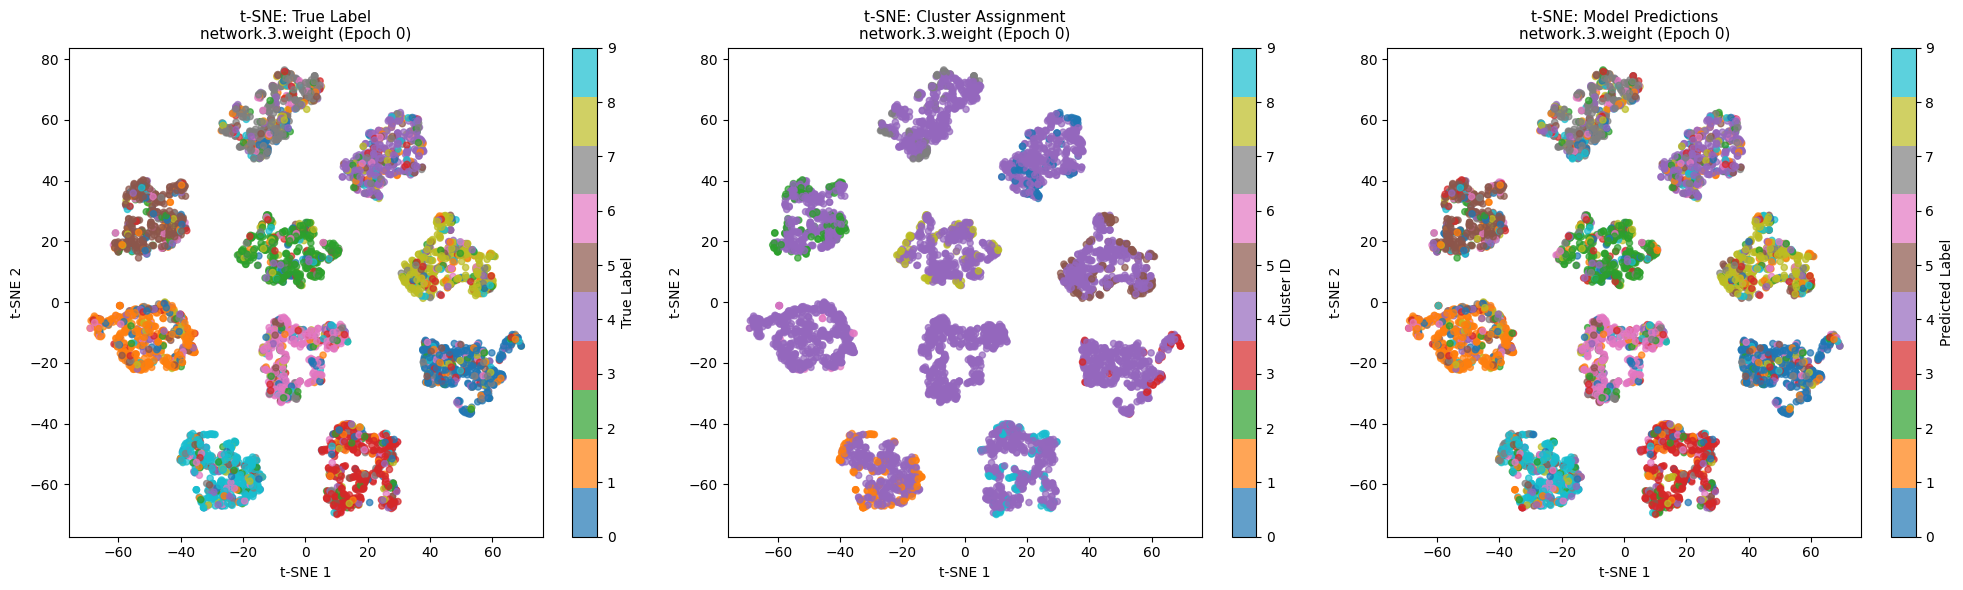


t-SNE Visualization Statistics:
  Parameter: network.3.weight
  Epoch: 0
  Samples used: 5000
  Number of clusters: 10
  t-SNE perplexity: 30

Label-Cluster Correspondence:
  Cluster 0: Dominant true label 4 (57.1%)
  Cluster 1: Dominant true label 9 (69.3%)
  Cluster 2: Dominant true label 5 (62.6%)
  Cluster 3: Dominant true label 0 (55.9%)
  Cluster 4: Dominant true label 1 (11.9%)
  Cluster 5: Dominant true label 8 (56.9%)
  Cluster 6: Dominant true label 1 (64.7%)
  Cluster 7: Dominant true label 7 (62.2%)
  Cluster 8: Dominant true label 2 (60.5%)
  Cluster 9: Dominant true label 3 (67.8%)

Prediction-Cluster Correspondence:
  Cluster 0: Dominant prediction 4 (41.8%)
  Cluster 1: Dominant prediction 9 (36.0%)
  Cluster 2: Dominant prediction 5 (40.2%)
  Cluster 3: Dominant prediction 0 (38.2%)
  Cluster 4: Dominant prediction 1 (12.0%)
  Cluster 5: Dominant prediction 8 (32.3%)
  Cluster 6: Dominant prediction 1 (29.4%)
  Cluster 7: Dominant prediction 7 (29.7%)
  Cluster 8: Dom

In [21]:
# Import t-SNE visualization function and config
from cluster_visualization import visualize_tsne_gradients
from config import Config

# Create t-SNE visualization using the clustering results from above
print("🎨 Creating t-SNE Visualization")
print("=" * 40)

# Load config to check for digit filtering
config = Config()

# Use the same parameter and clustering results from Cell 2
print(f"Creating t-SNE visualization for: {param_name}")
print(f"Using clustering results with {clustering_results['n_clusters']} clusters")

# Create the t-SNE visualization with filtering options
# This will create three plots: true labels, cluster assignments, and model predictions

# Filtering parameters (adjust these as needed)
start_fraction = 0.8    # Start from 20% through training (skip early samples)
end_fraction = 1.0      # Use samples up to 100% (end of training)
min_grad_percentile = 0.0  # Only use samples with gradient norm >= 0.5th percentile

print(f"t-SNE filtering settings:")
print(f"  Training position: {start_fraction:.1%} to {end_fraction:.1%}")
print(f"  Gradient percentile: >= {min_grad_percentile:.1f}%")
print(f"  (These match the k-means clustering settings)")

visualize_tsne_gradients(
    clustering_results=clustering_results,
    param_name=param_name,
    epoch=EPOCH_TO_LOAD,
    data_dir=GRADIENTS_DIR,
    n_samples=5000,  # Use 5000 samples for good performance
    perplexity=30,   # Good default for t-SNE
    random_state=42, # For reproducibility
    figsize=(20, 6), # Wide figure to show all three plots
    config=config,   # Pass config for filtering info
    start_fraction=start_fraction,        # Filter by training position
    end_fraction=end_fraction,            # Filter by training position
    min_grad_percentile=min_grad_percentile  # Filter by gradient norm
)

print("\n✅ t-SNE visualization completed!")
print("The visualization shows:")
print("  - Left: Points colored by true MNIST digit labels (original digits if filtered)")
print("  - Middle: Points colored by k-means cluster assignments") 
print("  - Right: Points colored by model predictions")
print("\nNote: If true labels or predictions are missing, cluster labels will be used as fallback.")

🎨 Creating UMAP Visualization
Creating UMAP visualization for: network.3.weight
Using clustering results with 10 clusters
UMAP filtering settings:
  Training position: 80.0% to 100.0%
  Gradient percentile: >= 0.5%
Creating UMAP visualization for network.3.weight (epoch 0)
Filtering: start_fraction=80.0%, end_fraction=100.0%, min_grad_percentile=0.5%
Loaded metadata: {'epoch': 0, 'batch_idx': 937, 'total_samples': 32, 'parameter_names': ['network.0.weight', 'network.0.bias', 'network.3.weight', 'network.3.bias']}
Found 3752 gradient files
Concatenating gradients from all batches...
Successfully loaded 4 parameters
  network.0.weight: torch.Size([60000, 32, 784]) (5742.19 MB)
  network.0.bias: torch.Size([60000, 32]) (7.32 MB)
  network.3.weight: torch.Size([60000, 10, 32]) (73.24 MB)
  network.3.bias: torch.Size([60000, 10]) (2.29 MB)
Total memory: 5825.04 MB
Loaded gradients tensor: torch.Size([60000, 10, 32])
Training position filtering: using samples 48000 to 59999 (12000/60000 samp

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved UMAP visualization to: results/umap_visualization_network_3_weight_epoch_0.png


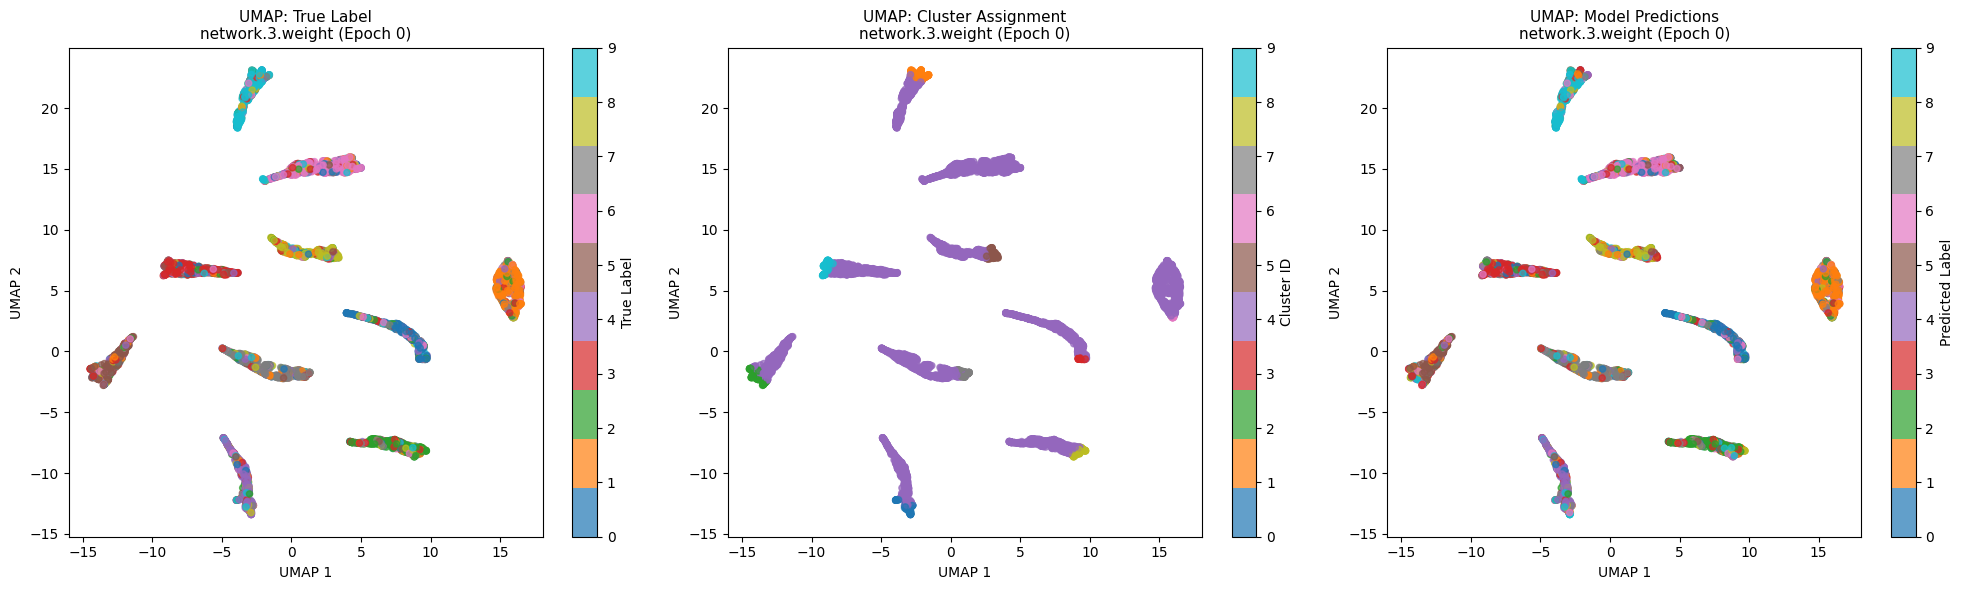


UMAP Visualization Statistics:
  Parameter: network.3.weight
  Epoch: 0
  Samples used: 5000
  Number of clusters: 10
  UMAP n_neighbors: 15
  UMAP min_dist: 0.1

Label-Cluster Correspondence:
  Cluster 0: Dominant true label 4 (55.8%)
  Cluster 1: Dominant true label 9 (62.9%)
  Cluster 2: Dominant true label 5 (56.0%)
  Cluster 3: Dominant true label 0 (51.9%)
  Cluster 4: Dominant true label 6 (12.3%)
  Cluster 5: Dominant true label 8 (54.6%)
  Cluster 6: Dominant true label 1 (50.0%)
  Cluster 7: Dominant true label 7 (58.3%)
  Cluster 8: Dominant true label 2 (54.7%)
  Cluster 9: Dominant true label 3 (68.1%)

Prediction-Cluster Correspondence:
  Cluster 0: Dominant prediction 4 (34.9%)
  Cluster 1: Dominant prediction 9 (34.3%)
  Cluster 2: Dominant prediction 5 (29.3%)
  Cluster 3: Dominant prediction 0 (29.6%)
  Cluster 4: Dominant prediction 6 (12.0%)
  Cluster 5: Dominant prediction 8 (36.1%)
  Cluster 6: Dominant prediction 8 (31.8%)
  Cluster 7: Dominant prediction 7 (34.

In [20]:
from cluster_visualization import visualize_umap_gradients
from config import Config

# Create UMAP visualization using the clustering results
print("🎨 Creating UMAP Visualization")
print("=" * 40)

# Load config to check for digit filtering
config = Config()

# Use the same parameter and clustering results from previous cells
print(f"Creating UMAP visualization for: {param_name}")
print(f"Using clustering results with {clustering_results['n_clusters']} clusters")

# UMAP visualization with filtering options
# Filtering parameters (adjust these as needed)
start_fraction = 0.8    # Start from 80% through training (skip early samples)
end_fraction = 1.0      # Use samples up to 100% (end of training)
min_grad_percentile = 0.5  # Only use samples with gradient norm >= 0.5th percentile

print(f"UMAP filtering settings:")
print(f"  Training position: {start_fraction:.1%} to {end_fraction:.1%}")
print(f"  Gradient percentile: >= {min_grad_percentile:.1f}%")

visualize_umap_gradients(
    clustering_results=clustering_results,
    param_name=param_name,
    epoch=EPOCH_TO_LOAD,
    data_dir=GRADIENTS_DIR,
    n_samples=5000,          # Use 5000 samples for good performance
    n_neighbors=15,          # UMAP parameter: number of neighbors (15 is default)
    min_dist=0.1,            # UMAP parameter: minimum distance (0.1 is default)
    random_state=42,         # For reproducibility
    figsize=(20, 6),         # Wide figure to show all three plots
    config=config,           # Pass config for filtering info
    start_fraction=start_fraction,        # Filter by training position
    end_fraction=end_fraction,            # Filter by training position
    min_grad_percentile=min_grad_percentile,  # Filter by gradient norm
    normalize_gradients=False  # Set to False to use original gradient magnitudes
)

print("\n✅ UMAP visualization completed!")
print("The visualization shows:")
print("  - Left: Points colored by true digit labels (original digits if filtered)")
print("  - Middle: Points colored by k-means cluster assignments") 
print("  - Right: Points colored by model predictions")
print("\nNote: UMAP parameters can be adjusted:")
print("  - n_neighbors: Higher values preserve more global structure (try 5-50)")
print("  - min_dist: Lower values create tighter clusters (try 0.001-0.5)")
print("  - normalize_gradients:0 Set to False to preserve gradient magnitudes")

# Optional: Compare different UMAP parameters
print("\n" + "="*50)
print("Optional: Compare different normalization settings")
print("="*50)